In [150]:
import numpy as np
import matplotlib.pyplot as plt

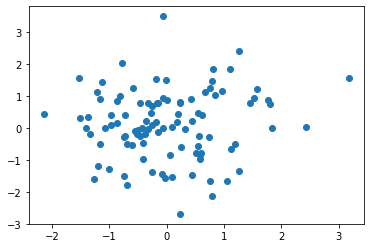

In [216]:
n = 100

points = np.random.randn(n,2)

plt.scatter(points[:,0],points[:,1])

In [217]:
indx = np.lexsort((points[:,0], points[:,1]))

sort_points = [(points[i,0],points[i,1]) for i in indx]
sort_points = np.array(sort_points)

P = sort_points[0]

In [218]:
sort_points = sort_points[1:, :]
print('len: %d'%(len(sort_points)))

len: 99


In [219]:
P

array([ 0.23827762, -2.69196458])

In [220]:
other_points = sorted(sort_points, key=lambda x: np.arctan2( (x[1]-P[1]), (x[0])-P[0] ) )

#print('other points: ', other_points)

In [221]:
def ccw(p1,p2,p3):
    return (p2[0]-p1[0])*(p3[1]-p1[1]) - (p2[1]-p1[1])*(p3[0]-p1[0])

In [222]:
other_points.append(P)

stack = []

stack.append(P)
stack.append(other_points[0])

for i in range(1,n-1):
    while(len(stack) >= 2 and ccw(stack[-2], stack[-1], other_points[i])<0):
        stack.pop()
    stack.append(other_points[i])


In [223]:
stack

[array([ 0.23827762, -2.69196458]),
 array([ 0.79672143, -2.12058844]),
 array([2.43388668, 0.0179573 ]),
 array([3.17315323, 1.58267367]),
 array([-0.07319821,  3.50620208]),
 array([-1.53231081,  1.57255038]),
 array([-2.1389468 ,  0.44916326]),
 array([-1.27439349, -1.58822054])]

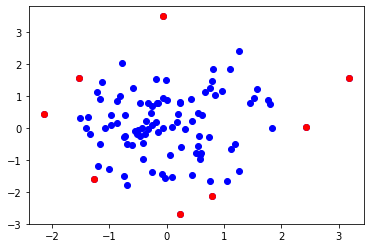

In [224]:
stack = np.array(stack)


plt.figure()
plt.scatter(points[:,0], points[:,1], c='blue')
plt.scatter(stack[:,0], stack[:,1], c='red')

In [225]:
other_points

[array([ 0.79672143, -2.12058844]),
 array([2.43388668, 0.0179573 ]),
 array([ 1.05800051, -1.65597576]),
 array([ 1.25586118, -1.35802758]),
 array([3.17315323, 1.58267367]),
 array([ 1.84134537, -0.00212407]),
 array([ 0.75419492, -1.66558428]),
 array([1.80695568, 0.74098699]),
 array([ 1.12535702, -0.65215247]),
 array([ 1.18883432, -0.48710209]),
 array([1.77454182, 0.87176098]),
 array([1.52069025, 0.94049029]),
 array([1.46197159, 0.78856287]),
 array([1.57114735, 1.23657795]),
 array([ 0.7293433, -0.2669833]),
 array([1.26662091, 2.40463349]),
 array([ 0.57801314, -0.96251464]),
 array([1.10975411, 1.84311615]),
 array([0.96061609, 1.1598302 ]),
 array([ 0.59453679, -0.79114415]),
 array([ 0.57561893, -0.8337664 ]),
 array([ 0.44212653, -1.47561157]),
 array([0.85031722, 1.04623205]),
 array([ 0.51068113, -0.78815478]),
 array([ 0.53925814, -0.56734956]),
 array([0.79609737, 1.48275523]),
 array([ 0.56297139, -0.23546807]),
 array([0.75879143, 1.26573646]),
 array([0.79974158, 

In [226]:
def displayPointsAndHull(points,P,hull):
    points = np.array(points)
    
    for i in range(points.shape[0]):
        plt.plot([P[0], points [i,0]], [P[1], points[i,1]])
    plt.scatter(points[:,0], points[:,1])
    hull = np.array(hull)
    plt.plot(hull[:,0], hull[:,1])

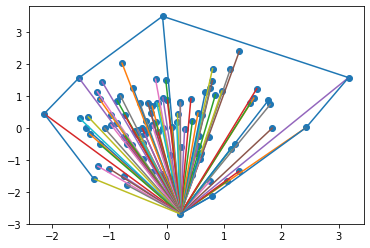

In [227]:
displayPointsAndHull(other_points, P, stack)